## Airbnb price predictor

The objective is to use Airbnb’s publicly available data in order to support hosts to predict and recommand optimal pricing for their listings.

The dataset contains detailed data of Airbnb listings in London, UK.

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# model and feature selection
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFECV, RFE

# regression models
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from xgboost import XGBRegressor

# pipeline
from sklearn.pipeline import Pipeline

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis (EDA)

### Loading the dataset

In [ ]:
col_names = ['id', 'name', 'summary', 'space', 'description',	'experiences_offered',
'neighborhood_overview', 'host_since', 'host_id', 'host_response_time', 'host_response_rate',	
'host_is_superhost', 'host_listings_count', 'host_identity_verified', 'street', 'neighbourhood_cleansed', 
'city', 'zipcode', 'latitude', 'longitude',	'property_type', 'room_type', 'accommodates',	
'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 
'security_deposit', 'cleaning_fee','guests_included',	'extra_people',	'minimum_nights',	'maximum_nights',
'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
'number_of_reviews','review_scores_rating', 'review_scores_accuracy',	'review_scores_cleanliness', 
'review_scores_checkin', 'review_scores_communication','review_scores_location',
'review_scores_value', 'instant_bookable', 'cancellation_policy', 'reviews_per_month']

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
listings_df = pd.read_csv('listings.csv', usecols=col_names)

### Description of each column:

*   **experiences_offered** - slightly unclear as it does not appear to directly relate to Airbnb - Experiences, but this seems to be the main recommended category of travel type, e.g. business

*   **host_since** - date that the host first joined Airbnb

*   **host_response_time** - average amount of time the host takes to reply to messages
*   **host_response_rate** - proportion of messages that the host replies to
*   **host_is_superhost** - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
*   **host_listings_count** - how many listings the host has in total
*   **host_identity_verified** - whether or not the host has been verified with id
*   **neighbourhood_cleansed** - the London borough the property is in
*   **property_type** - type of property, e.g. house or flat
*   **room_type** - type of listing, e.g. entire home, private room or shared room
*   **accommodates** - how many people the property accommodates
*   **bathrooms** - number of bathrooms
*   **bedrooms** - number of bedrooms
*   **beds** - number of beds
*   **bed_type** - type of bed, e.g. real bed or sofa-bed
*   **amenities** - list of amenities
*   **price** - nightly advertised price (the target variable)
*   **security_deposit** - the amount required as a security deposit
*   **cleaning_fee** - the amount of the cleaning fee (a fixed amount paid per booking)
*   **guests_included** - the number of guests included in the booking fee
*   **extra_people** - the price per additional guest above the guests_included price
*   **minimum_nights** - the minimum length of stay
*   **maximum_nights** - the maximum length of stay
*   **calendar_updated** - when the host last updated the calendar
*   **availability_30** - how many nights are available to be booked in the next 30 days
*   **availability_60** - how many nights are available to be booked in the next 60 days
*   **availability_90** - how many nights are available to be booked in the next 90 days
*   **availability_365** - how many nights are available to be booked in the next 365 days
*   **number_of_reviews** - the number of reviews left for the property
*   **number_of_reviews_ltm** - the number of reviews left for the property in the last twelve months
*   **first_review** - the date of the first review
*   **last_review** - the date of the most recent review
*   **review_scores_rating** - guests can score properties overall
*   **review_scores_accuracy** - guests can score the accuracy of a property's description from 1 to 10 stars
*   **review_scores_cleanliness** - guests can score a property's cleanliness from 1 to 10 stars
*   **review_scores_checkin** - guests can score their check-in from 1 to 10 stars
*   **review_scores_communication** - guests can score a host's communication from 1 to 10 stars
*   **review_scores_location** - guests can score a property's location from 1 to 10 stars
*   **review_scores_value** - guests can score a booking's value for money from 1 to 10 stars
*   **instant_bookable** - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)
*   **cancellation_policy** - the type of cancellation policy, e.g. strict or moderate
*   **reviews_per_month** - calculated field of the average number of reviews left by guest each month


### Exploring the dataset

In [ ]:
listings_df.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,host_id,host_since,host_response_time,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
0,11551,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,43039,2009-10-03,within an hour,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,1.58
1,38151,Double room/ lounge,NaN,"Comfortable, large double room /lounge area av...","Comfortable, large double room /lounge area av...",none,NaN,163634,2010-07-11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
2,13913,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,54730,2009-11-16,within a few hours,...,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,moderate,0.17
3,38407,Canary Wharf Immaculate Apt for 2,"The bright, light and stylish apartment in Can...","An entire bright, light and stylish apartment....","The bright, light and stylish apartment in Can...",none,Very easy to get to all the main sites. The tu...,164566,2010-07-12,a few days or more,...,95.0,9.0,10.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,1.23
4,90700,Sunny Notting Hill flat & terrace,This is a home not a hotel - for the cost gues...,This charming 1 bedroom with en-suite bathroom...,This is a home not a hotel - for the cost gues...,none,A quick guide or a run through about the area ...,491286,2011-04-07,within a day,...,88.0,9.0,9.0,10.0,10.0,10.0,9.0,t,strict_14_with_grace_period,3.33


In [ ]:
# data shape
rows, cols = listings_df.shape
print(f"The listings dataset is composed of {rows} rows and {cols} columns.")

The listings dataset is composed of 85068 rows and 52 columns.


In [ ]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           85068 non-null  int64  
 1   name                         85043 non-null  object 
 2   summary                      80736 non-null  object 
 3   space                        59218 non-null  object 
 4   description                  82683 non-null  object 
 5   experiences_offered          85068 non-null  object 
 6   neighborhood_overview        54694 non-null  object 
 7   host_id                      85068 non-null  int64  
 8   host_since                   85056 non-null  object 
 9   host_response_time           59168 non-null  object 
 10  host_response_rate           59168 non-null  object 
 11  host_is_superhost            85056 non-null  object 
 12  host_listings_count          85056 non-null  float64
 13  host_identity_ve

### Dropping unecessary and redundant columns

In [ ]:
# drop the id and various text descriptions of the listings
listings_df = listings_df.drop(labels= ["id", "name", "summary", "space", "description", "neighborhood_overview"], axis= 1)

# drop the redundant location features
listings_df = listings_df.drop(labels= ["street", "zipcode"], axis= 1)

### Fixing the data types of some columns

In [ ]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   experiences_offered          85068 non-null  object 
 1   host_id                      85068 non-null  int64  
 2   host_since                   85056 non-null  object 
 3   host_response_time           59168 non-null  object 
 4   host_response_rate           59168 non-null  object 
 5   host_is_superhost            85056 non-null  object 
 6   host_listings_count          85056 non-null  float64
 7   host_identity_verified       85056 non-null  object 
 8   neighbourhood_cleansed       85068 non-null  object 
 9   city                         84821 non-null  object 
 10  latitude                     85068 non-null  float64
 11  longitude                    85068 non-null  float64
 12  property_type                85068 non-null  object 
 13  room_type       

We can notice that some columns such as `host_since`,  `host_response_time`, `host_response_rate`, `price`, `security_deposit`, `cleaning_fee`, and `extra_people` are classified as objects.

In [ ]:
listings_df[['host_since', 'host_response_time', 'host_response_rate', 'price', 'security_deposit', 'cleaning_fee', 'extra_people']].head()

,host_since,host_response_time,host_response_rate,price,security_deposit,cleaning_fee,extra_people
0,2009-10-03,within an hour,100%,$88.00,$400.00,$30.00,$20.00
1,2010-07-11,NaN,NaN,$65.00,NaN,NaN,$0.00
2,2009-11-16,within a few hours,90%,$65.00,$100.00,$15.00,$15.00
3,2010-07-12,a few days or more,0%,$79.00,NaN,NaN,$0.00
4,2011-04-07,within a day,86%,$105.00,$0.00,$35.00,$10.00


It seems that `host_response_time` is correctly classified as an object but the rest of the features need to be changed to numerical.

In [ ]:
# convert host_since to date time
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'])

# convert host_reponse rate to numerical
listings_df['host_response_rate'] = listings_df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)

# convert price, security_deposit, cleaning_fee, extra_people to numerical
for col in ['price', 'security_deposit', 'cleaning_fee', 'extra_people']:
  listings_df[col] = listings_df[col].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
listings_df[['host_since', 'host_response_time', 'host_response_rate', 'price', 'security_deposit', 'cleaning_fee', 'extra_people']].head()

,host_since,host_response_time,host_response_rate,price,security_deposit,cleaning_fee,extra_people
0,2009-10-03,within an hour,100.0,88.0,400.0,30.0,20.0
1,2010-07-11,NaN,NaN,65.0,NaN,NaN,0.0
2,2009-11-16,within a few hours,90.0,65.0,100.0,15.0,15.0
3,2010-07-12,a few days or more,0.0,79.0,NaN,NaN,0.0
4,2011-04-07,within a day,86.0,105.0,0.0,35.0,10.0


### Missing Values

In [ ]:
def summarize_missingness(df, label= None):
    '''
    Utility function to summarize missing or NaN values
    '''
    nulls = df.isnull()
    counts = nulls.sum()
    percs = nulls.mean().mul(100.)
    
    if label is None:
        label = ""
    nulls_df = pd.DataFrame({f'{label} Count of missing/NaN values': counts, 'Percentage of missing values': percs}, 
                            index=counts.index)
    
    display(nulls_df)

In [ ]:
vars_with_na = [col for col in listings_df.columns if listings_df[col].isnull().sum() > 0]
summarize_missingness(listings_df[vars_with_na])

,Count of missing/NaN values,Percentage of missing values
host_since,12,0.014106
host_response_time,25900,30.446231
host_response_rate,25900,30.446231
host_is_superhost,12,0.014106
host_listings_count,12,0.014106
host_identity_verified,12,0.014106
city,247,0.290356
bathrooms,121,0.142239
bedrooms,89,0.104622
beds,149,0.175154


### Representing Unique Values of Categorical Features

In [ ]:
# find the number of unique values for each column
print('Number of unique values in each categorical column:\n')
cat_col = listings_df.select_dtypes(object).columns
for i in cat_col:
    print(f'{i}: {listings_df[i].nunique()}')

Number of unique values in each categorical column:

experiences_offered: 5
host_response_time: 4
host_is_superhost: 2
host_identity_verified: 2
neighbourhood_cleansed: 33
city: 707
property_type: 41
room_type: 4
bed_type: 5
amenities: 75093
calendar_updated: 103
instant_bookable: 2
cancellation_policy: 8


In [ ]:
categorical_df = pd.DataFrame()
for categorical_feature in cat_col:
    tmp_df = pd.DataFrame({categorical_feature:listings_df[categorical_feature].unique()})
    categorical_df = pd.concat([categorical_df, tmp_df], axis=1)
categorical_df.fillna('')

,experiences_offered,host_response_time,host_is_superhost,host_identity_verified,neighbourhood_cleansed,city,property_type,room_type,bed_type,amenities,calendar_updated,instant_bookable,cancellation_policy
0,family,within an hour,t,t,Lambeth,London,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",4 days ago,t,strict_14_with_grace_period
1,none,,f,f,Croydon,Upper Norwood,House,Private room,Futon,{},never,f,flexible
2,business,within a few hours,,,Islington,Islington,Guest suite,Hotel room,Pull-out Sofa,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",6 months ago,,moderate
3,romantic,a few days or more,,,Tower Hamlets,Kensington,Townhouse,Shared room,Airbed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",2 weeks ago,,super_strict_30
4,social,within a day,,,Kensington and Chelsea,Earlsfield,Serviced apartment,,Couch,"{Internet,Wifi,Kitchen,Heating,Washer,Essentia...",5 weeks ago,,super_strict_60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75088,,,,,,,,,,"{Wifi,Kitchen,Heating,Washer,Essentials,Shampo...",,,
75089,,,,,,,,,,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",,,
75090,,,,,,,,,,"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detecto...",,,
75091,,,,,,,,,,"{TV,Wifi,Kitchen,""Free parking on premises"",Br...",,,


### Categorical Variables Distributions

We remove the "city" as well as "amenities" from the list for visualization purposes. These features will be visualized later.
We also remove the "calendar_updated" as it is not a categorical feature.

In [ ]:
# remove city, amenities and calendar_updated from the categorical list of features
cat_col = [elem for elem in cat_col if elem not in ['city', 'amenities', 'calendar_updated', 
                                                    'neighbourhood_cleansed', 'property_type']]

cat_col

['experiences_offered',
 'host_response_time',
 'host_is_superhost',
 'host_identity_verified',
 'room_type',
 'bed_type',
 'instant_bookable',
 'cancellation_policy']

In [ ]:
def get_countplot(cat_list, dataset, hue=None, figheight=15):
  """
  Takes in a litst of categorical features and returns a countplot for each
  """
  if len(cat_list)%2 == 0:
    nrow = int(len(cat_list)/2)
  else:
    nrow = int((len(cat_list) //2) +1)

  fig, ax = plt.subplots(nrow, 2, figsize=(12,5), constrained_layout=True)
  fig.set_figheight(figheight)
  for i, cat_var in enumerate(cat_list):
      j,k = np.unravel_index(i, shape= (nrow, 2))
      cp = sns.countplot(y=cat_var, data=dataset, hue=hue, ax=ax[j,k])
      ax[j,k].set_title(cat_var)

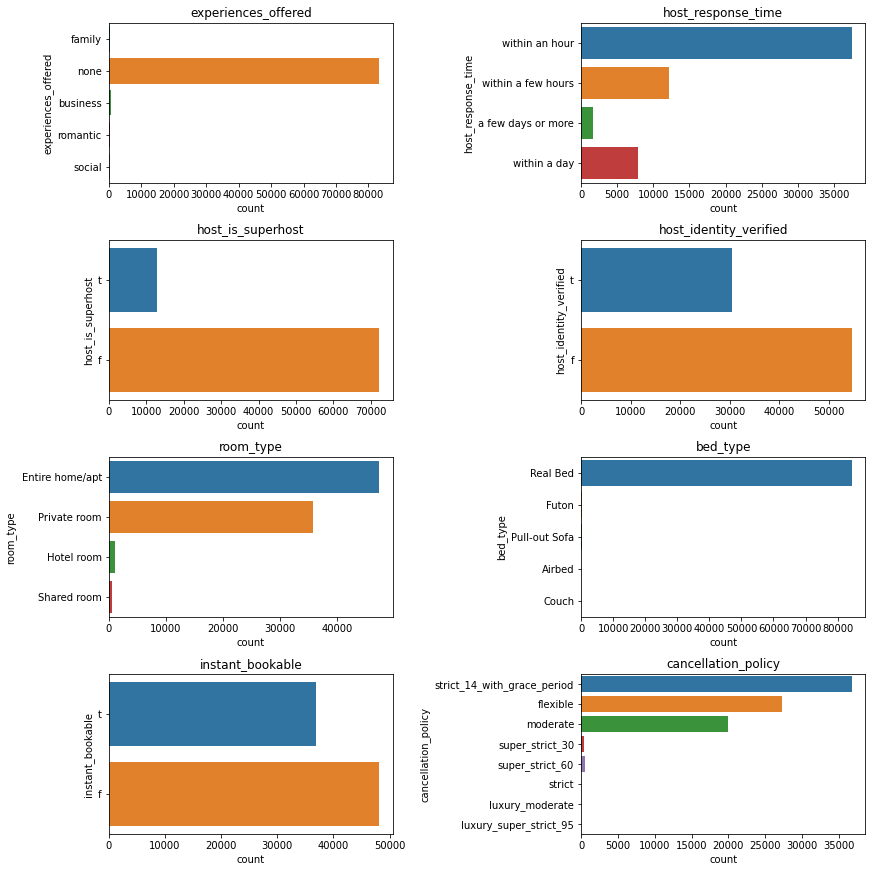

In [ ]:
get_countplot(cat_col,  dataset=listings_df, figheight=12)

For the "neighbourhood_cleansed" as well as "property_type" we perform the following visualization

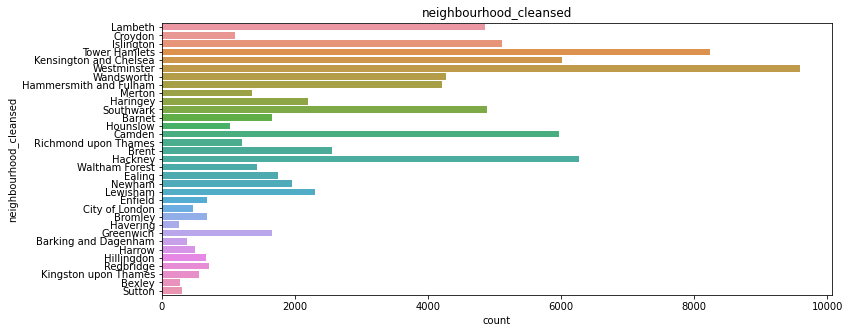

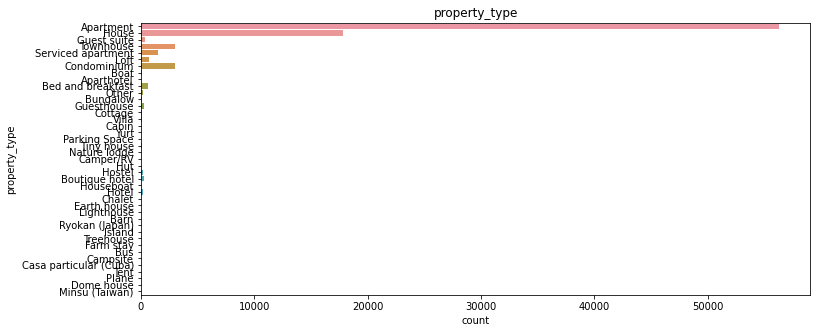

In [ ]:
for cat_var in ['neighbourhood_cleansed', 'property_type']:
    fig, ax = plt.subplots(figsize=(12,5))
    try:
        sns.countplot(y=cat_var, data=listings_df)
        ax.set_title(cat_var)
        plt.show()
    except Exception as e:
        print(e)

In [ ]:
# show counts of unique values in city and amenities
for x in ['city', 'amenities']:
  print(x,"\n")
  print(listings_df[x].value_counts())
  print("\n","*"*50,"\n")

city 

Greater London                       46869
London                               32410
London                                 647
Richmond                               176
Twickenham                             175
                                     ...  
Bexley                                   1
Mornington Crescent,  Kings Cross        1
Fulham, london                           1
Banstead, England, GB                    1
Hertfordshire                            1
Name: city, Length: 707, dtype: int64

 ************************************************** 

amenities 

{}                                                                                                                                                                                                                                                                                                                                                                                                                             

### Numerical Variables Distributions

In [ ]:
num_col = listings_df.select_dtypes(['int', 'float']).columns
num_col

Index(['host_id', 'host_response_rate', 'host_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

We remove host_id because it is not a numerical feature, we also remove longitude and latitude. Finally we remove price because it is the target variable.

In [ ]:
num_col = [elem for elem in num_col if elem not in ['host_id', 'latitude', 'longitude', 
                                                    'price']]
num_col

['host_response_rate',
 'host_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

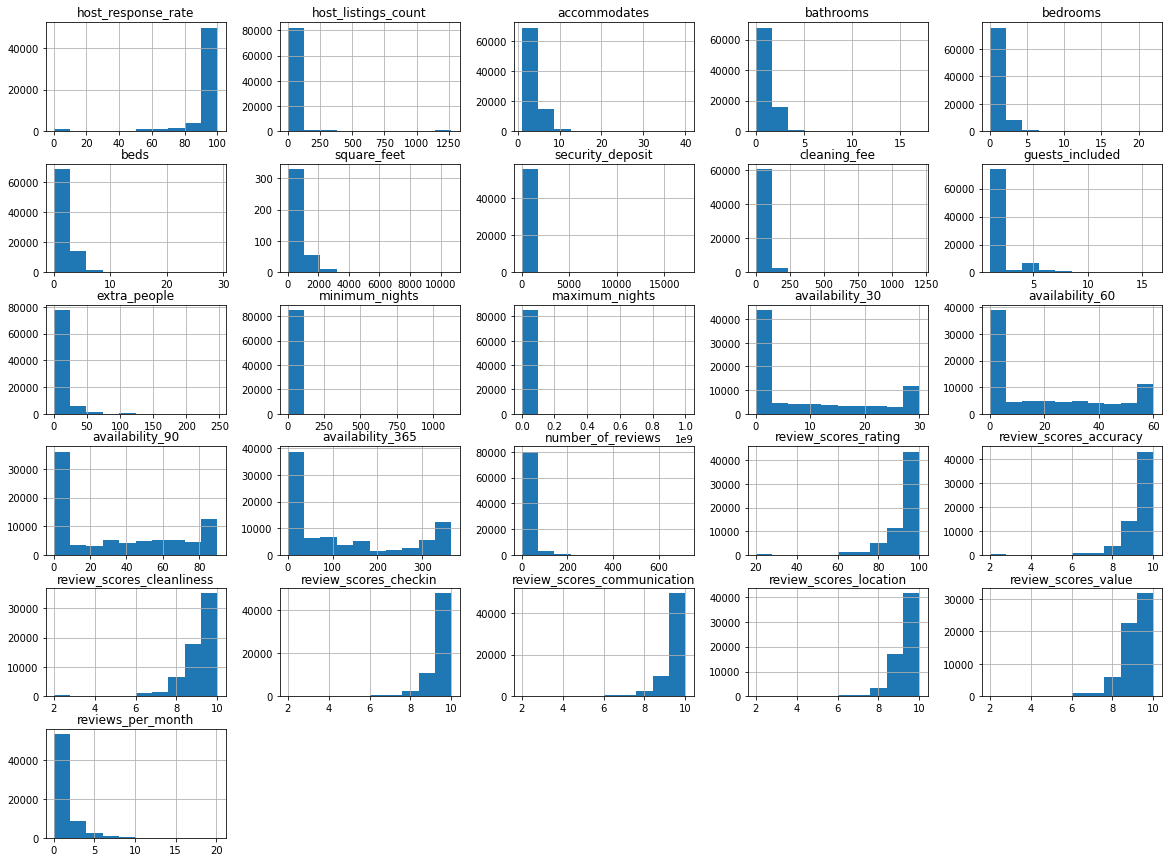

In [ ]:
listings_df[num_col].hist(figsize=(20,15))
plt.show()

We can see that many variables have a skewed distribution, we will try using a power transform in the `preprocessing pipeline` to make the variables more-Gaussian.

### Target Variable Distribution

The target variable is the price of a listing in usd.

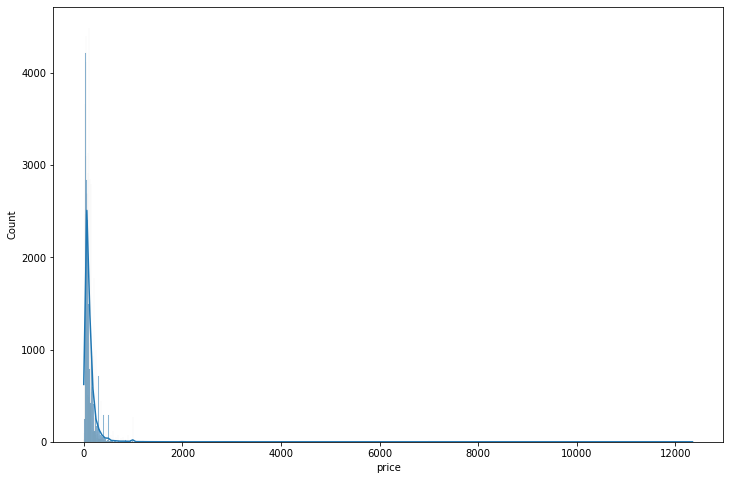

In [ ]:
# visualize the target variable: price
plt.figure(figsize=(12,8))
sns.histplot(listings_df['price'], kde=True)
plt.show()

The target variable is positively skewed, we can perform a log transformation to render the target distribution more gaussian like to **avoid biasing our ML model** to the majority labels.

### Influence of Categorical Features on Price
Recalling categorical features:

In [ ]:
cat_col

['experiences_offered',
 'host_response_time',
 'host_is_superhost',
 'host_identity_verified',
 'room_type',
 'bed_type',
 'instant_bookable',
 'cancellation_policy']

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


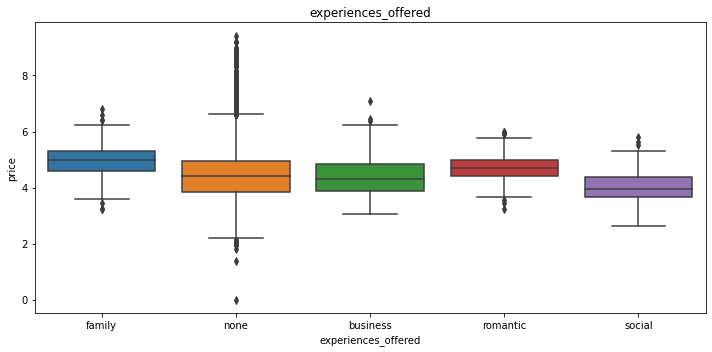

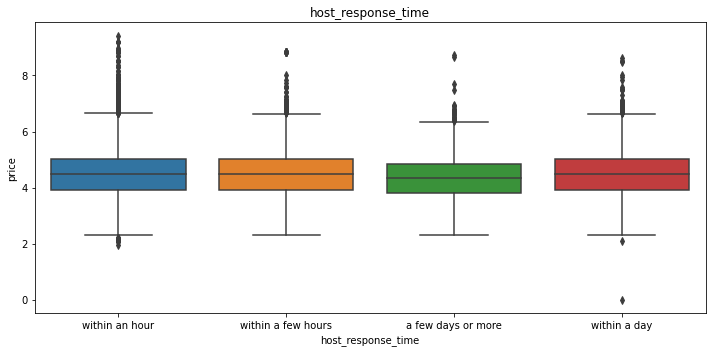

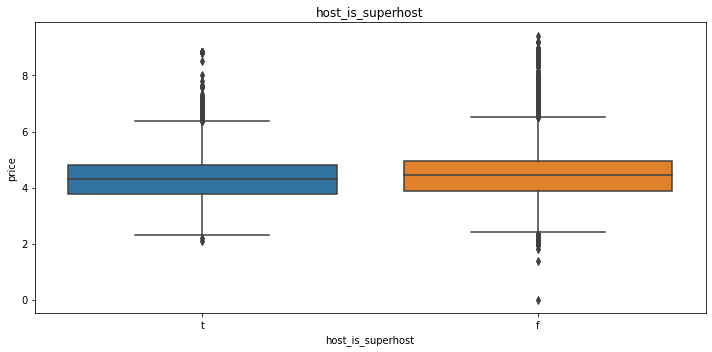

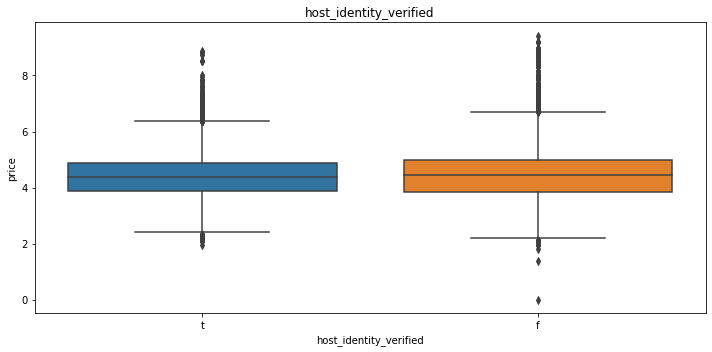

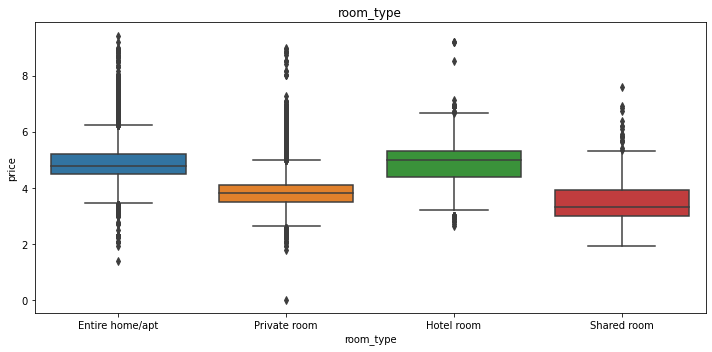

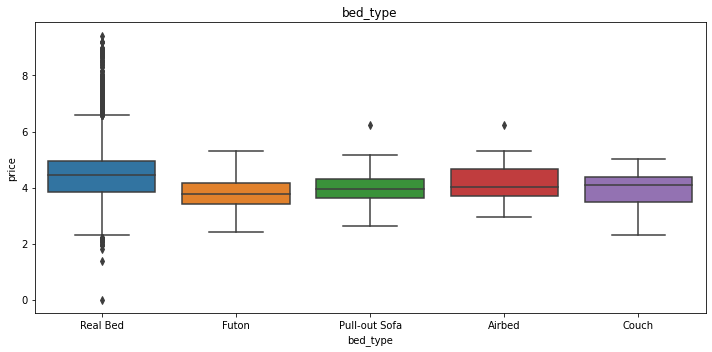

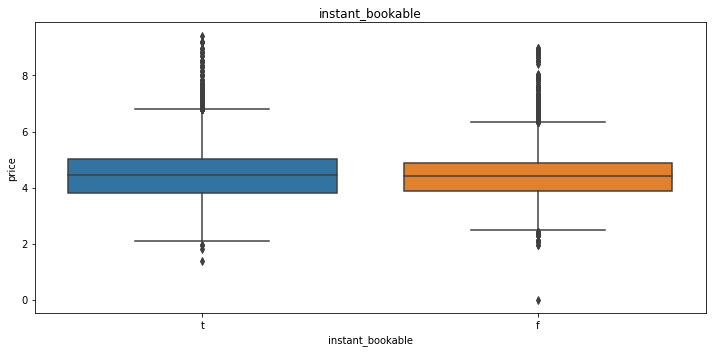

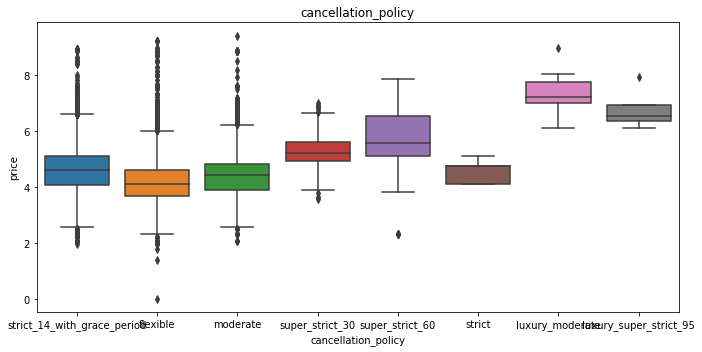

In [ ]:
y = np.log(listings_df['price'])

for col in cat_col:
    try:
        fig, ax = plt.subplots(figsize=(10,5))
        sns.boxplot(x=listings_df[col], y=y)
        ax.set_title(f"{col}")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(e)

### Influence of Some Numerical Features on the Target Variable

In [ ]:
num_col = ['host_response_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
           'security_deposit', 'cleaning_fee', 'guests_included', 
           'extra_people', 'minimum_nights', 'maximum_nights',
           'number_of_reviews', 'reviews_per_month']

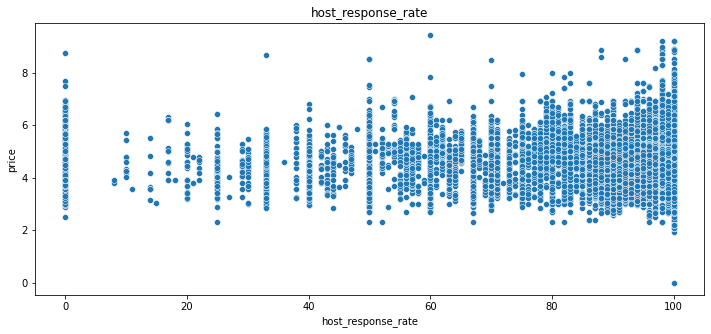

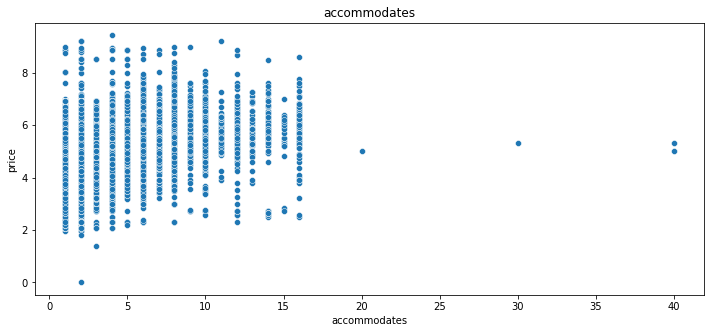

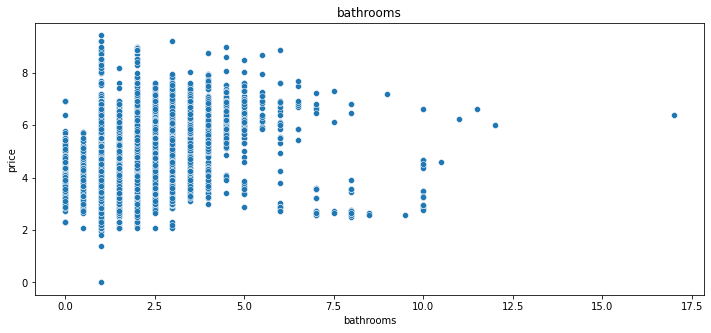

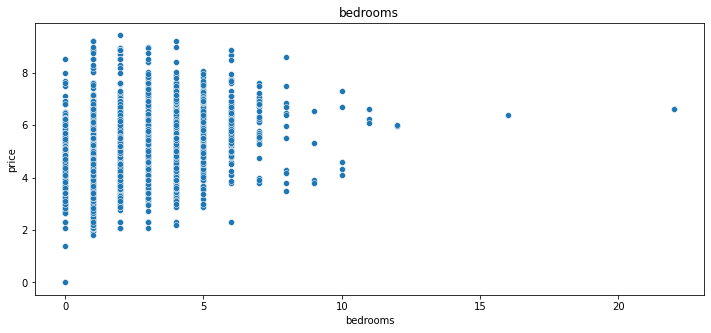

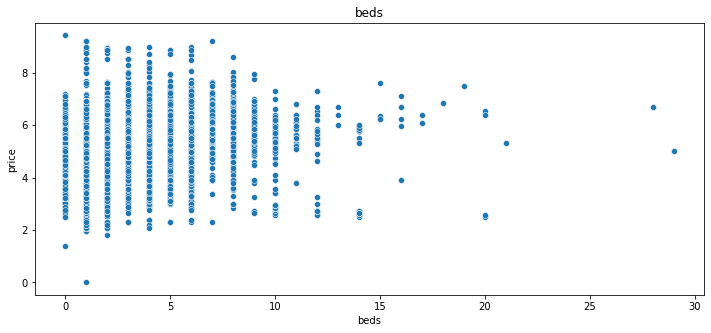

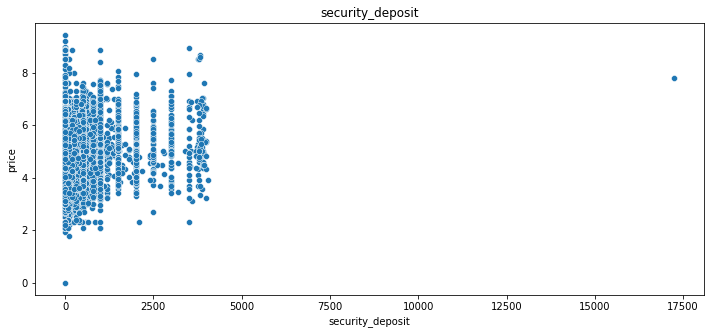

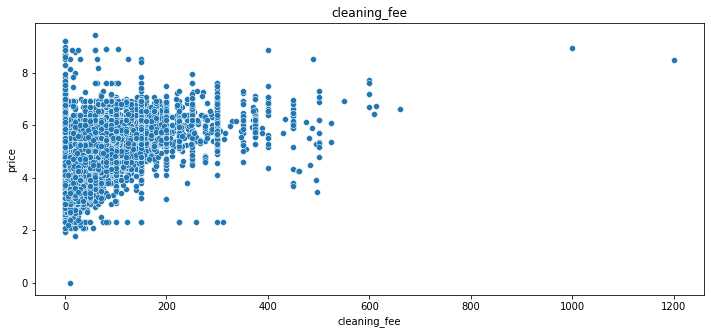

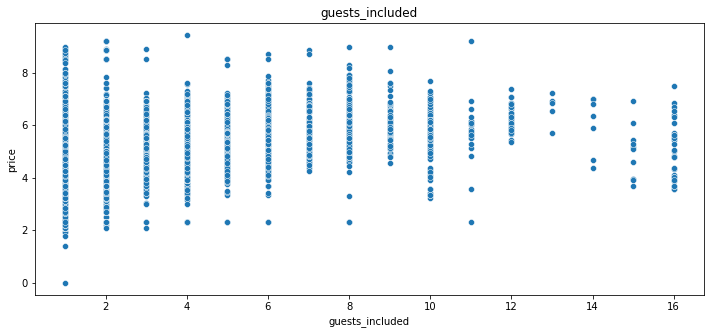

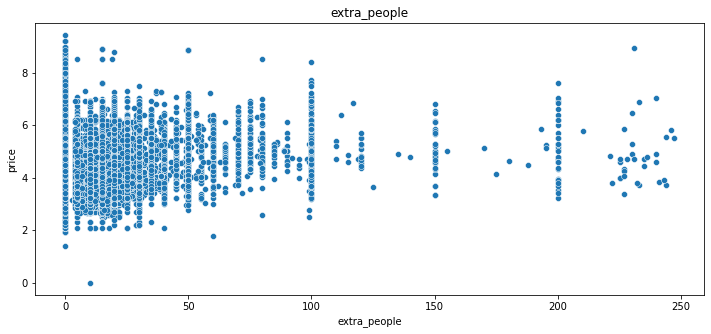

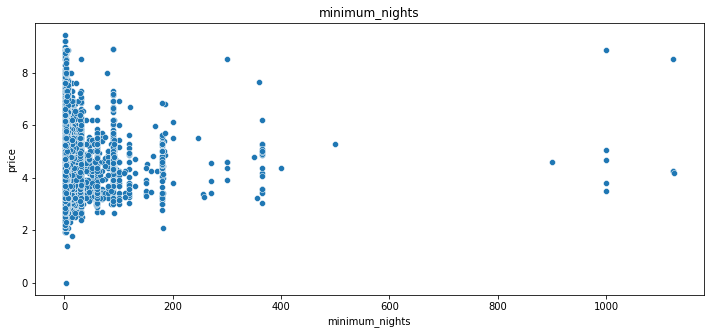

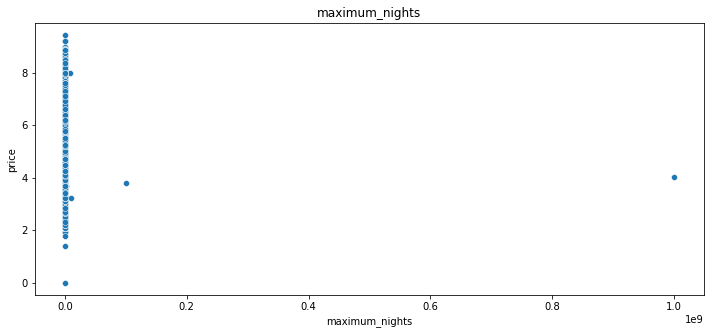

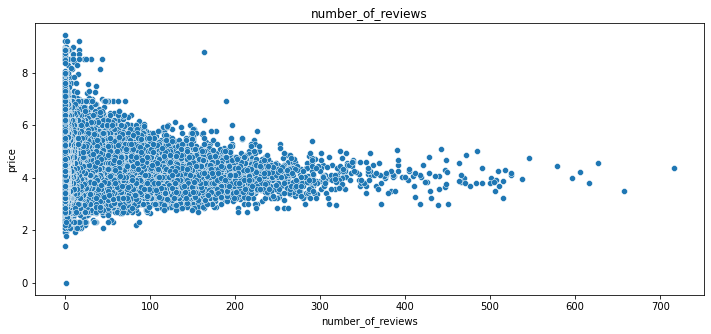

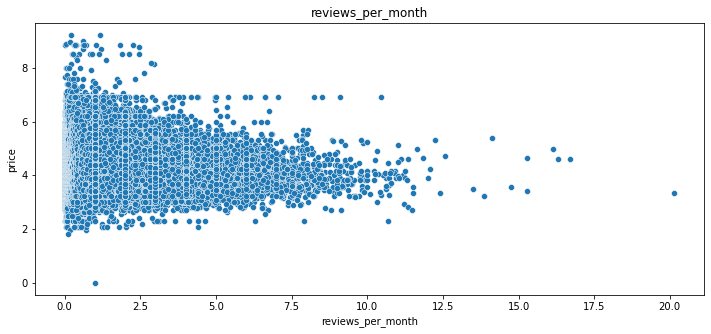

In [ ]:
for col in num_col:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.scatterplot(x=listings_df[col], y=y)
    ax.set_title(col)       
    plt.show()

### Calculating Correlation

In [ ]:
num_col = listings_df.select_dtypes(['int', 'float']).columns
num_col = [elem for elem in num_col if elem not in ['host_id', 'latitude', 'longitude']]

corr_with_target = listings_df[num_col].corr()["price"]
print('Correlations of the numerical features with the target:\n')
corr_with_target.abs().sort_values(ascending=False)[1:]

Correlations of the numerical features with the target:



square_feet                    0.333347
accommodates                   0.315737
bedrooms                       0.298969
cleaning_fee                   0.293735
beds                           0.267294
bathrooms                      0.264195
security_deposit               0.227039
guests_included                0.218508
host_listings_count            0.116394
availability_365               0.097770
availability_30                0.090917
availability_60                0.090421
availability_90                0.086725
number_of_reviews              0.067270
minimum_nights                 0.060425
extra_people                   0.054201
review_scores_value            0.052907
review_scores_location         0.044673
reviews_per_month              0.043376
review_scores_communication    0.034851
review_scores_checkin          0.027901
review_scores_accuracy         0.021405
review_scores_cleanliness      0.014153
review_scores_rating           0.005838
host_response_rate             0.002899


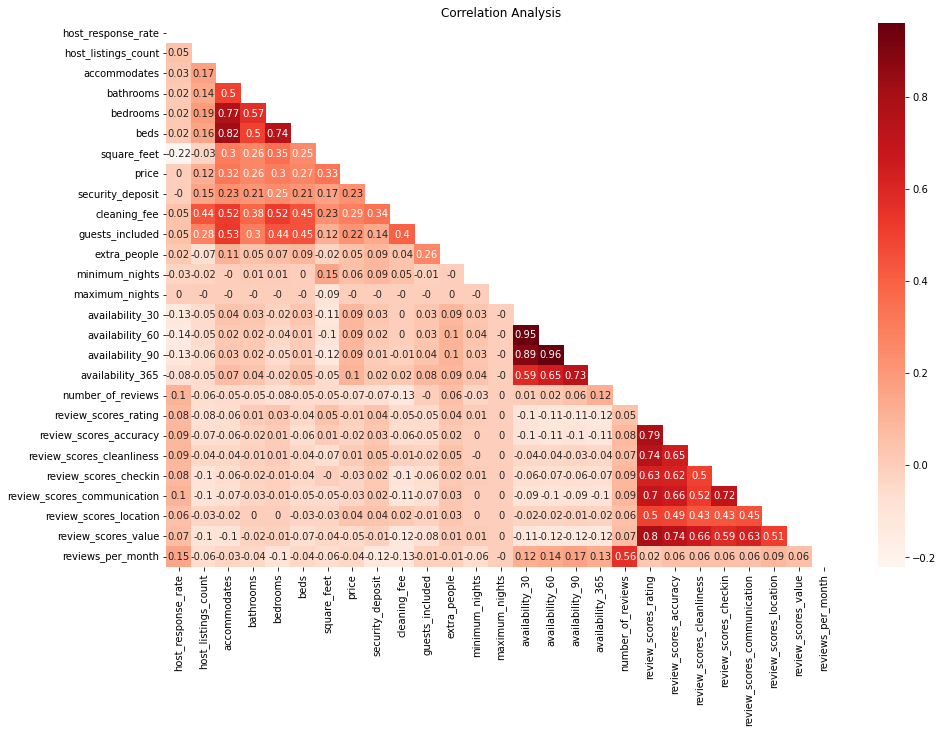

In [ ]:
corr_matrix = listings_df[num_col].corr()
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))
plt.figure(figsize=(15,10))
ax = plt.axes()
sns.heatmap(corr_matrix.round(2), mask=mask, square=True, cmap=plt.cm.Reds, annot=True)
plt.title('Correlation Analysis')
plt.axis('tight')
plt.show()

We can see that the availabilty_30, availability_60, availabilty_90 are very highly correlated which each others. The review scores are also highly correlated between them.

### Price vs longitude and latitude

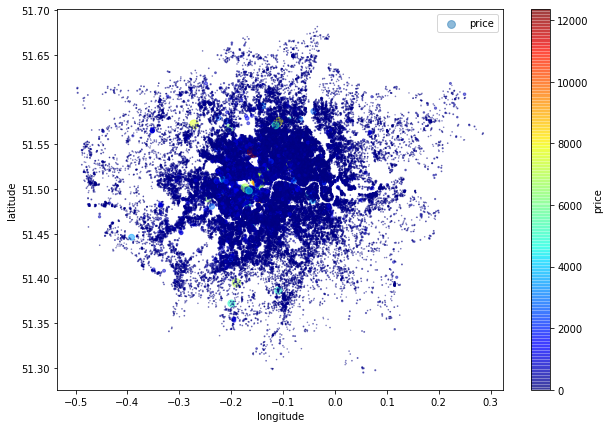

In [ ]:
# price vs longitude and latitude
listings_df.plot(kind="scatter", 
                 x="longitude", 
                 y="latitude", alpha=0.5,
                 s=listings_df["price"]/100, 
                 label="price", 
                 figsize=(10,7),
                 c="price", 
                 cmap=plt.get_cmap("jet"), 
                 colorbar=True,
                 sharex=False)
plt.legend();

## Data Preprocessing

### Dealing with some missing values

Dropping columns with a large amount of NaNs

In [ ]:
# identifying columns with more than 50% missing values
vars_with_50_percent_nan = [col for col in listings_df.columns if listings_df[col].isnull().mean() > 0.5]
print(f'The feature columns with more than 50 % missing values are: {vars_with_50_percent_nan}')

The feature columns with more than 50 % missing values are: ['square_feet']


In [ ]:
# dropping columns with more than 50% missing values
listings_df.drop(columns=vars_with_50_percent_nan, inplace=True)

Dropping rows with a small number of missing values

In [ ]:
# identifying columns with nans having 1% missing values
vars_with_1_percent_nan = [col for col in listings_df.columns if listings_df[col].isnull().mean() < 0.01 and listings_df[col].isnull().mean() > 0]
print(f'The feature columns with nans having 1% missing values are: {vars_with_1_percent_nan}')

The feature columns with nans having 1% missing values are: ['host_since', 'host_is_superhost', 'host_listings_count', 'host_identity_verified', 'city', 'bathrooms', 'bedrooms', 'beds']


In [ ]:
# dropping columns with nans having 1% missing values
listings_df.dropna(subset=vars_with_1_percent_nan, inplace=True)

In [ ]:
# new data shape
rows, cols = listings_df.shape
print(f"The listings dataset is composed of {rows} rows and {cols} columns.")

The listings dataset is composed of 84519 rows and 43 columns.


### Dropping columns with few unique values

As see in the EDA some columns have very few unique values

In [ ]:
london_count = (listings_df['city'].value_counts()[0] 
 + listings_df['city'].value_counts()[1] 
 + listings_df['city'].value_counts()[2]) / listings_df.shape[0]

print(f'Around {london_count*100:.3f}% of the city column is composed of London.')

Around 94.263% of the city column is composed of London.


In [ ]:
# drop the city column
listings_df = listings_df.drop(labels= ["city"], axis= 1)

In the "Categorical Variables Distributions" part of the EDA we also observed that the `bed_type` and `experiences_offered` columns contain very few unique values.

In [ ]:
print(listings_df['bed_type'].value_counts())
print("\n","*"*50,"\n")
x = listings_df['bed_type'].value_counts()[0]/ len(listings_df)
print(f'Real bed consitute {x*100:.2f}% of the bed_type column.')

Real Bed         83848
Pull-out Sofa      395
Futon              172
Couch               66
Airbed              38
Name: bed_type, dtype: int64

 ************************************************** 

Real bed consitute 99.21% of the bed_type column.


In [ ]:
# drop the bed_type column
listings_df = listings_df.drop(labels= ["bed_type"], axis= 1)

In [ ]:
# unique values in experiences_offered columns
print(listings_df['experiences_offered'].value_counts(normalize=True))
print("\n","*"*50,"\n")
x = listings_df['experiences_offered'].value_counts()[0]/ len(listings_df)
print(f'None consitute {x*100:.2f}% of the experiences_offered column.')

none        0.980170
business    0.006862
family      0.005656
social      0.004851
romantic    0.002461
Name: experiences_offered, dtype: float64

 ************************************************** 

None consitute 98.02% of the experiences_offered column.


In [ ]:
# drop the experiences_offered column
listings_df = listings_df.drop(labels= ["experiences_offered"], axis= 1)

### Dealing with the host_id column

In [ ]:
print("Percentage occurence of the top host_id:\n")
print(listings_df['host_id'].value_counts(normalize=True))
print("\n","*"*50,"\n")
print("Since host_id has a very large amount of unique values, the top host has around 1% of \nthe listings and the rest of the host have less than 0.3%, this column will be dropped")
listings_df = listings_df.drop(labels= ["host_id"], axis= 1)

Percentage occurence of the top host_id:

33889201     0.011820
137094377    0.002792
28820321     0.002757
156158778    0.002603
48165024     0.002508
               ...   
28396300     0.000012
28867885     0.000012
132792805    0.000012
70027804     0.000012
210531062    0.000012
Name: host_id, Length: 53152, dtype: float64

 ************************************************** 

Since host_id has a very large amount of unique values, the top host has around 1% of 
the listings and the rest of the host have less than 0.3%, this column will be dropped


### Reducing the number of categories in some categorical columns

Some columns such `property_type` and `cancellation_policy` as have categories with rare occurances, we will group and rename them to 'Others' or 'Rare'.

In [ ]:
def replace_thresh(df, col, thresh, new_val):
    """
    Take as input a dataframe, a column name, a threshold and a new value
    Combine categories that have an occurence less than the threshold by
    assigning them all the same value.  
    """

    s = df[col].value_counts(normalize=True).mul(100)
    df[col] = np.where(df[col].isin(s.index[s < thresh]), new_val, df[col])
    return df

In [ ]:
# replace values of the property_type column that have an occurance of less than 1% by Other
listings_df = replace_thresh(listings_df, 'property_type', 1, 'Other')
listings_df['property_type'].value_counts()

Apartment             55938
House                 17760
Other                  3416
Townhouse              2969
Condominium            2956
Serviced apartment     1480
Name: property_type, dtype: int64

In [ ]:
# replace values of the property_type column that have an occurance of less than 1% by other_policy
listings_df = replace_thresh(listings_df, 'cancellation_policy', 1, 'other_policy')
listings_df['cancellation_policy'].value_counts()

strict_14_with_grace_period    36589
flexible                       27030
moderate                       19922
other_policy                     978
Name: cancellation_policy, dtype: int64

In [ ]:
# replace values of the neighbourhood_cleansed column that have an occurance of less than 1% by other_neighbourhoud
listings_df = replace_thresh(listings_df, 'neighbourhood_cleansed', 1, 'other_neighbourhoud')
listings_df['neighbourhood_cleansed'].value_counts(normalize=True)

Westminster               0.112744
Tower Hamlets             0.096913
Hackney                   0.073830
Kensington and Chelsea    0.070907
Camden                    0.070363
other_neighbourhoud       0.063773
Islington                 0.060117
Southwark                 0.057478
Lambeth                   0.057076
Wandsworth                0.050214
Hammersmith and Fulham    0.049480
Brent                     0.030029
Lewisham                  0.027012
Haringey                  0.025852
Newham                    0.022894
Ealing                    0.020575
Barnet                    0.019439
Greenwich                 0.019392
Waltham Forest            0.016825
Merton                    0.015985
Richmond upon Thames      0.014139
Croydon                   0.012897
Hounslow                  0.012068
Name: neighbourhood_cleansed, dtype: float64

### Dropping highly correlated features

As seen in the EDA some features are highly correlated, we will only keep one

In [ ]:
listings_df = listings_df.drop(labels= ['availability_30','availability_60', 
                                        'availability_90', 'review_scores_accuracy',
                                        'review_scores_cleanliness', 'review_scores_checkin',
                                        'review_scores_communication', 'review_scores_location',
                                        'review_scores_value'], axis= 1)

### Extracting the year out of the host_since column

In [ ]:
listings_df['host_since'].head()

0   2009-10-03
2   2009-11-16
3   2010-07-12
4   2011-04-07
5   2009-12-05
Name: host_since, dtype: datetime64[ns]

In [ ]:
# extract the year out of the host_since column
listings_df['host_since'] = listings_df['host_since'].apply(lambda row: row.year)
listings_df['host_since'].value_counts()

2015    16184
2016    12403
2014    11601
2017    10746
2018     8906
2019     7724
2013     7399
2012     6269
2011     2625
2010      498
2009      155
2008        9
Name: host_since, dtype: int64

### Feature Engineering Amenities

To feature engineer the amenities columns we will do the following steps:
1. Transform each amenity listed in the amenities column into a binary feature depending if is included in the listing or not
2. Calculate the spearman correlation of each amenity with price and select the top 5 most correlated features.
3. Add the top 5 most correlated features to our dataset.

In [ ]:
# Example of amenities listed
listings_df.amenities[:1].values

array(['{TV,"Cable TV",Internet,Wifi,Kitchen,"Paid parking off premises","Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,"Smoke detector","Carbon monoxide detector",Essentials,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in",Lockbox,"Pack ’n Play/travel crib","Hot water","Long term stays allowed"}'],
      dtype=object)

In [ ]:
# create an amenities dataframe including price
listings_df['amenities'] = [x.replace('{', '').replace('}','').replace('"','').split(',') for x in listings_df['amenities']]
mlb = MultiLabelBinarizer()
amenities = pd.DataFrame(mlb.fit_transform(listings_df.pop('amenities')), columns=mlb.classes_, index=listings_df.index)
amenities['price'] = listings_df['price']
amenities.head()

,,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Alfresco bathtub,Amazon Echo,Apple TV,...,Wide hallways,Wifi,Window guards,Wine cellar,Wine cooler,Wood-burning fireplace,Yoga studio,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,price
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,88.0
2,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,65.0
3,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,79.0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,105.0
5,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,100.0


In [ ]:
# find the top 5 amenities that are most correlated with price
amenities_corr = amenities.corr(method='spearman')['price']
print('The top 5 most correlated amenities with price are:\n')
amenities_corr.sort_values(ascending=False)[1:].head()

The top 5 most correlated amenities with price are:



TV                  0.373032
Dishwasher          0.280207
Dryer               0.231712
Iron                0.209652
Private entrance    0.209594
Name: price, dtype: float64

In [ ]:
# add the top 5 correlated amenities to the original dataset
for col in ['TV', 'Dishwasher', 'Dryer', 'Iron', 'Private entrance']:
  listings_df[col] = amenities[col]

### Transforming the target variable

The labels were converted into logarithm of the prices to mitigate the impact of the outliers in the dataset.

In [ ]:
listings_df = listings_df[listings_df['price'] != 0]

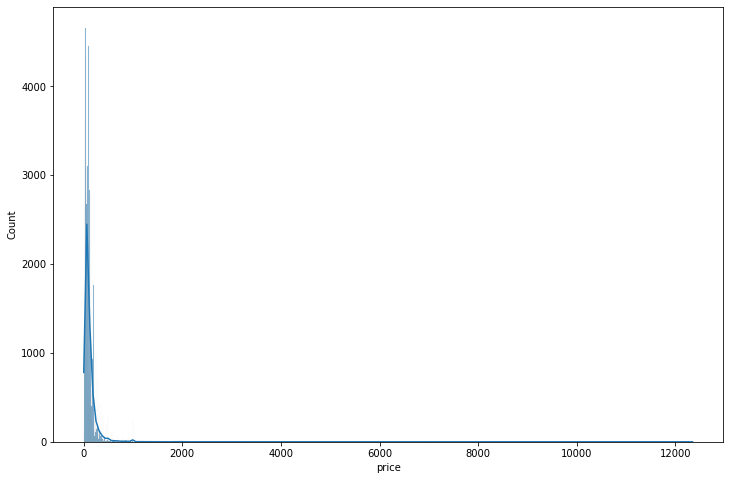

In [ ]:
# visualize the target variable: price
plt.figure(figsize=(12,8))
sns.histplot(listings_df['price'], kde=True)
plt.show()

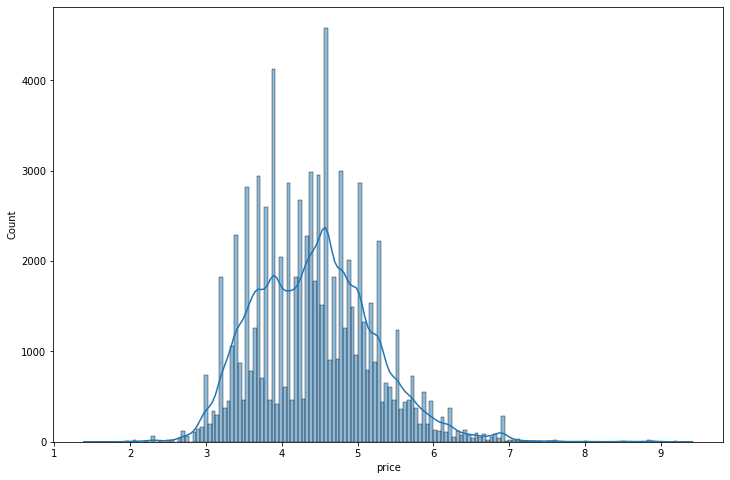

In [ ]:
# convert the price to log of the price and visualize
listings_df['price'] = np.log(listings_df['price'])

plt.figure(figsize=(12,8))
sns.histplot(listings_df['price'], kde=True)
plt.show()

### Column transformer for outlier removal

In [ ]:
def outlier_removal(X,factor):
    X = pd.DataFrame(X).copy()
    for i in range(X.shape[1]):
        x = pd.Series(X.iloc[:,i]).copy()
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (factor * iqr)
        upper_bound = q3 + (factor * iqr)
        X.iloc[((X.iloc[:,i] < lower_bound) | (X.iloc[:,i] > upper_bound)),i] = np.nan 
    return X

#creating outlier_remover object using FunctionTransformer with factor=1.5
outlier_remover = FunctionTransformer(outlier_removal,kw_args={'factor':1.5})

### Defining categorical and numerical features

In [ ]:
numerical_ix = listings_df.select_dtypes(include=['int64', 'float64']).columns
numerical_ix

Index(['host_since', 'host_response_rate', 'host_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'TV',
       'Dishwasher', 'Dryer', 'Iron', 'Private entrance'],
      dtype='object')

In [ ]:
categorical_ix = listings_df.select_dtypes(include=['object', 'bool']).columns
categorical_ix

Index(['host_response_time', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type',
       'calendar_updated', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

### Preprocessing Pipeline

In [ ]:
numerical_ix = ['host_response_rate', 'host_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights','availability_365',
       'number_of_reviews', 'review_scores_rating', 'reviews_per_month']

ordinal_ix = ['host_is_superhost', 'host_identity_verified', 'instant_bookable',
              'TV', 'Dishwasher', 'Dryer', 'Iron', 'Private entrance']

categorical_ix = ['host_since', 'host_response_time', 'neighbourhood_cleansed', 
                  'property_type', 'room_type', 'cancellation_policy']
#                  'host_is_superhost', 'host_identity_verified', 'instant_bookable']
#                  'TV', 'Dishwasher', 'Dryer', 'Iron', 'Private entrance']

In [ ]:
# preprocessing categorical features
categorical_pipeline = Pipeline(steps=[('impute',SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# preprocessing categorical ordinal features
ordinal_pipeline = Pipeline(steps=[('impute',SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                    ('ord',OrdinalEncoder())])

# preprocessing numerical features

numerical_pipeline = Pipeline(steps=[
#                                     ('outlier', outlier_remover),
                                     ('imputer', SimpleImputer(missing_values=np.NaN, strategy='mean')),
                                     ('normalize',MinMaxScaler()), 
#                                    ('standardize', StandardScaler()),
                                     ('power', PowerTransformer(method='yeo-johnson'))
                                     ])
                              
# full preprocessing pipeline
col_transform = ColumnTransformer(transformers =[                                                
    ('num', numerical_pipeline, numerical_ix),
    ('ord', ordinal_pipeline, ordinal_ix),
    ('cat', categorical_pipeline, categorical_ix)])

## Splitting Data To Train/Test 80%/20%

In [ ]:
# define seed and number of parallel jobs
SEED = 42
n_jobs = -1

# define features and target
X = listings_df.drop(labels= ['price'], axis= 1)
y = listings_df['price']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Note: X_train will be used for cross validation purposes so it will be preprocessed inside pipelines only when to avoid data leakage.

## Baseline Model

A linear regression will be used as a baseline model

In [ ]:
rfe = RFECV(step=5, estimator=LinearRegression())

# define the pipeline
steps = list()
steps.append(('prep', col_transform))
steps.append(('s', rfe))
steps.append(('model', LinearRegression()))
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
cv = KFold(n_splits=2, shuffle=True, random_state=SEED)

# evaluate the pipeline using cross validation and calculate RMSE
scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=n_jobs)

# convert RMSE scores to positive values
scores = np.absolute(scores)

# summarize the model performance
print(np.mean(scores))

0.4442120450170106


## Feature Selection

### Helper function to get the feature names out after the preprocessing  

scikit-learn’s ColumnTransformer is a great tool for data preprocessing but returns a numpy array without column names. Its method get_feature_names() fails if at least one transformer does not create new columns. Here’s a quick solution to return column names that works for all transformers and pipelines  

source: https://johaupt.github.io/blog/columnTransformer_feature_names.html

In [ ]:
import warnings
import sklearn
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

### RFE

In [ ]:
# define the pipeline
rfe = RFE(estimator=RandomForestRegressor(), step=5, n_features_to_select=20)
steps = list()
steps.append(('prep', col_transform))
steps.append(('s', rfe))
steps.append(('model', RandomForestRegressor()))
pipeline = Pipeline(steps=steps)

# fit
pipeline.fit(X_train, y_train)

In [ ]:
# get the list of feature names after preprocessing
feature_names = get_feature_names(col_transform)

In [ ]:
feature_names

In [ ]:
# get the list of best features names according to rfe
best_feature_names = pipeline.named_steps['s'].get_feature_names_out(feature_names)
best_feature_names

array(['num__host_response_rate', 'num__host_listings_count',
       'num__latitude', 'num__longitude', 'num__accommodates',
       'num__bathrooms', 'num__bedrooms', 'num__security_deposit',
       'num__cleaning_fee', 'num__extra_people', 'num__minimum_nights',
       'num__maximum_nights', 'num__availability_365',
       'num__number_of_reviews', 'num__review_scores_rating',
       'num__reviews_per_month', 'ohe__x2_Kensington and Chelsea',
       'ohe__x2_Westminster', 'ohe__x4_Private room',
       'ohe__x4_Shared room'], dtype=object)

### LASSO

In [ ]:
# define the pipeline
steps = list()
steps.append(('prep', col_transform))
steps.append(('lasso', LassoCV(n_jobs=-1)))
pipeline = Pipeline(steps=steps)

# fit
pipeline.fit(X_train, y_train)

In [ ]:
lasso_df = pd.DataFrame(list(zip(feature_names,pipeline.named_steps['lasso'].coef_)), columns = ['predictor','coefficient'])
lasso_df.sort_values(by='coefficient')

,predictor,coefficient
45,ohe__x2_Croydon,-0.268657
74,ohe__x4_Shared room,-0.256697
55,ohe__x2_Lewisham,-0.162927
64,ohe__x2_other_neighbourhoud,-0.130506
61,ohe__x2_Waltham Forest,-0.102253
...,...,...
53,ohe__x2_Kensington and Chelsea,0.389477
77,ohe__x5_other_policy,0.390273
63,ohe__x2_Westminster,0.413533
72,ohe__x4_Hotel room,0.481565


### Report best features and update pipeline

In [ ]:
selected_features = ['host_response_rate', 'host_listings_count',
                     'latitude', 'longitude', 'accommodates', 
                     'bathrooms', 'bedrooms', 'security_deposit', 
                     'cleaning_fee', 'extra_people', 'minimum_nights', 
                     'maximum_nights', 'availability_365', 
                     'number_of_reviews', 'review_scores_rating', 
                     'reviews_per_month', 'neighbourhood_cleansed', 
                     'room_type']

numerical_ix = selected_features[:16]
categorical_ix = selected_features[16:]

In [ ]:
# preprocessing categorical features
categorical_pipeline = Pipeline(steps=[('impute',SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                        ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# preprocessing numerical features

numerical_pipeline = Pipeline(steps=[
#                                     ('outlier', outlier_remover),
                                     ('imputer', SimpleImputer(missing_values=np.NaN, strategy='mean')),
                                     ('normalize',MinMaxScaler()), 
#                                    ('standardize', StandardScaler()),
                                     ('power', PowerTransformer(method='yeo-johnson'))
                                     ])
                              
# full preprocessing pipeline
col_transform = ColumnTransformer(transformers =[                                                
    ('num', numerical_pipeline, numerical_ix),
    ('cat', categorical_pipeline, categorical_ix)])

In [ ]:
# subset best features
X_train = X_train[selected_features]

## Regression Model Training

### Hyperparameter tuning

#### Random Forest Regressor

In [ ]:
# define the pipeline
steps = list()
steps.append(('prep', col_transform))
steps.append(('model', RandomForestRegressor(random_state=42)))
pipeline_rf = Pipeline(steps=steps)

In [ ]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = { 
    'model__n_estimators': [200, 500, 800, 1000],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [4,5,6,7,8]
}

search = RandomizedSearchCV(pipeline_rf, param_distributions=param_grid, n_iter=5, 
                            scoring='neg_root_mean_squared_error', n_jobs=n_jobs, 
                            cv=cv, random_state=42)

result = search.fit(X_train, y_train)

In [ ]:
# print results
print(np.absolute(result.best_score_))
print(result.best_params_)

0.4492205666474789
{'model__n_estimators': 200, 'model__max_features': 'auto', 'model__max_depth': 7}


#### Support Vector Regression (SVR)

In [ ]:
# subset the data for SVR
X_subset = X_train[:5000]
y_subset = y_train[:5000]

# define the svm pipeline
steps = list()
steps.append(('prep', col_transform))
steps.append(('model', SVR()))
pipeline_svm = Pipeline(steps=steps)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid_svm = { 
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': [0.0001,0.001,0.01,0.1,1,10,100,1000],
    'model__C' : [0.001,0.01,0.1,1,10,100]
}

search = RandomizedSearchCV(pipeline_svm, param_distributions=param_grid_svm, n_iter=2, 
                            scoring='neg_root_mean_squared_error', n_jobs=n_jobs, 
                            cv=cv, random_state=42, verbose=3)

result = search.fit(X_subset, y_subset)

# print results
print(np.absolute(result.best_score_))
print(result.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
0.4451331512615364
{'model__kernel': 'linear', 'model__gamma': 0.0001, 'model__C': 100}


#### Gradient Boosting Tree

In [ ]:
# define the pipeline
steps = list()
steps.append(('prep', col_transform))
steps.append(('model', GradientBoostingRegressor(random_state=42)))
pipeline_gb = Pipeline(steps=steps)

# parameter grid
param_grid = { 
    'model__n_estimators': [200, 500, 800, 1000],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [4,5,6,7,8]
}


search = RandomizedSearchCV(pipeline_gb, param_distributions=param_grid, n_iter=5, 
                            scoring='neg_root_mean_squared_error', n_jobs=n_jobs, 
                            cv=cv, random_state=42)


result = search.fit(X_train, y_train)

# print results
print(np.absolute(result.best_score_))
print(result.best_params_)

0.3711597649466568
{'model__n_estimators': 500, 'model__max_features': 'sqrt', 'model__max_depth': 8}


#### XGBoost

In [ ]:
#define the Xgbregressor
steps =[] 
steps.append(('prep', col_transform))
steps.append(('model',XGBRegressor(objective ='reg:squarederror')))
pipeline_xgb = Pipeline(steps=steps)

# A parameter grid for XGBoost
param_grid = {
        'model__min_child_weight': [1, 5, 10],
        'model__gamma': [0.5, 1, 1.5, 2, 5],
        'model__subsample': [0.6, 0.8, 1.0],
        'model__colsample_bytree': [0.6, 0.8, 1.0],
        'model__max_depth': [3, 4, 5]
        }


search=RandomizedSearchCV(pipeline_xgb, param_distributions=param_grid,n_iter=5,
                       scoring='neg_root_mean_squared_error', cv=cv, verbose=0, n_jobs=n_jobs)

result = search.fit(X_train, y_train)

# print results
print(np.absolute(result.best_score_))
print(result.best_params_)

0.3908188081079881
{'model__subsample': 0.8, 'model__min_child_weight': 1, 'model__max_depth': 5, 'model__gamma': 0.5, 'model__colsample_bytree': 0.8}


### Model Comparison on Different Metrics (using holdout)

In [ ]:
# preproces
X_train_1 = col_transform.fit_transform(X_train)
X_test_1 = col_transform.transform(X_test[selected_features])

# subset the data for SVR
X_subset = X_train_1[:2000]
y_subset = y_train[:2000]

Metric: MSE, Model: LR: 0.202
Metric: MSE, Model: SVR: 0.207
Metric: MSE, Model: RF: 0.193
Metric: MSE, Model: GB: 0.125
Metric: MSE, Model: XGB: 0.143
Metric: RMSE, Model: LR: 0.449
Metric: RMSE, Model: SVR: 0.455
Metric: RMSE, Model: RF: 0.440
Metric: RMSE, Model: GB: 0.353
Metric: RMSE, Model: XGB: 0.378
Metric: MAE, Model: LR: 0.322
Metric: MAE, Model: SVR: 0.323
Metric: MAE, Model: RF: 0.314
Metric: MAE, Model: GB: 0.247
Metric: MAE, Model: XGB: 0.266


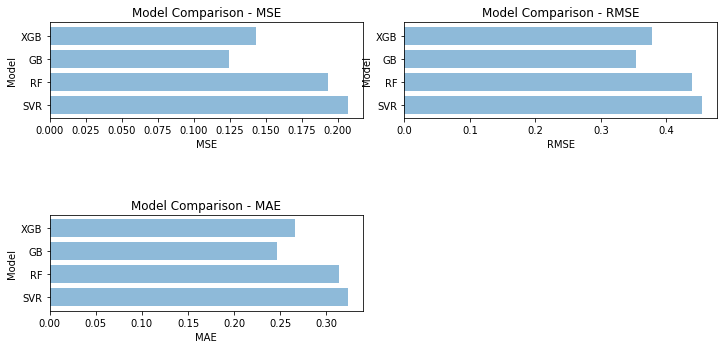

In [ ]:
# Train & compare a collection of regressor models
regressor_1 = LinearRegression()
regressor_2 = SVR(kernel='linear', gamma=0.0001, C=100)
regressor_3 = RandomForestRegressor(random_state= 42, n_estimators = 500, max_features='sqrt', max_depth = 8)
regressor_4 = GradientBoostingRegressor(random_state= 42, n_estimators = 500, max_features='sqrt', max_depth = 8)
regressor_5 = XGBRegressor(objective ='reg:squarederror', Subsample = 1.0, min_child_weight=1, max_depth=5, gamma = 0.5, 
                           colsample_bytree = 1.0)

# Select type of machine learning model
models = []
models.append(regressor_1)
models.append(regressor_2)
models.append(regressor_3)
models.append(regressor_4)
models.append(regressor_5)

# Train & evaluate each model
metrics = {"MSE": mean_squared_error, "RMSE": mean_squared_error, "MAE": mean_absolute_error}
scores = {"MSE": [], "RMSE": [], "MAE": []}
names = ['LR', 'SVR', 'RF', 'GB', 'XGB']

fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize= (10, 5))
#fig.suptitle("Model Comparison on Different Metrics", fontsize=18, y=0.95)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.delaxes(axes[1][1])

for metric, ax in zip(metrics.keys(), axes.ravel()):    
    for i, model in enumerate(models):
        if i == 1:
          model.fit(X= X_subset, y= y_subset)
        else:
          model.fit(X= X_train_1, y= y_train)

        predicted_output = model.predict(X_test_1)
        
        if metric == "RMSE":
            score = metrics[metric](y_test, predicted_output, squared= False)
        else:
            score = metrics[metric](y_test, predicted_output)
        
        scores[metric].append(score)
        output = f"Metric: {metric}, Model: {names[i]}: {score:.3f}"
        print(output)
    
    ax.barh(names[1:len(names)], scores[metric][1:len(scores[metric])], align='center', alpha=0.5) # skip LR score
    ax.set_xlabel(metric)
    ax.set_ylabel('Model')
    ax.set_title(f"Model Comparison - {metric}")

fig.subplots_adjust(hspace=1)
plt.show()

### Model Comparison on Different Metrics (using entire dataset)

In [ ]:
# preproces
X_1 = col_transform.fit_transform(X[selected_features])

# subset the data for SVR
X_subset = X_1[:2000]
y_subset = y[:2000]

Metric: MSE, Model: LR: 0.205
Metric: MSE, Model: SVR: 0.226
Metric: MSE, Model: RF: 0.191
Metric: MSE, Model: GB: 0.064
Metric: MSE, Model: XGB: 0.139
Metric: RMSE, Model: LR: 0.453
Metric: RMSE, Model: SVR: 0.476
Metric: RMSE, Model: RF: 0.437
Metric: RMSE, Model: GB: 0.254
Metric: RMSE, Model: XGB: 0.372
Metric: MAE, Model: LR: 0.323
Metric: MAE, Model: SVR: 0.350
Metric: MAE, Model: RF: 0.312
Metric: MAE, Model: GB: 0.181
Metric: MAE, Model: XGB: 0.261


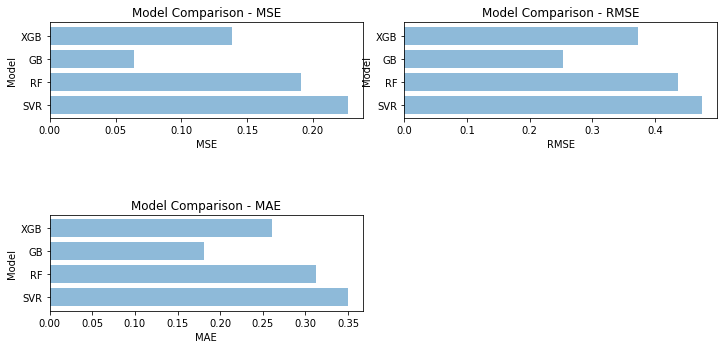

In [ ]:
# Train & compare a collection of regressor models
regressor_1 = LinearRegression()
regressor_2 = SVR(kernel='linear', gamma=0.0001, C=100)
regressor_3 = RandomForestRegressor(random_state= 42, n_estimators = 500, max_features='sqrt', max_depth = 8)
regressor_4 = GradientBoostingRegressor(random_state= 42, n_estimators = 500, max_features='sqrt', max_depth = 8)
regressor_5 = XGBRegressor(objective ='reg:squarederror', Subsample = 1.0, min_child_weight=1, max_depth=5, gamma = 0.5, 
                           colsample_bytree = 1.0)

# Select type of machine learning model
models = []
models.append(regressor_1)
models.append(regressor_2)
models.append(regressor_3)
models.append(regressor_4)
models.append(regressor_5)

# Train & evaluate each model
metrics = {"MSE": mean_squared_error, "RMSE": mean_squared_error, "MAE": mean_absolute_error}
scores = {"MSE": [], "RMSE": [], "MAE": []}
names = ['LR', 'SVR', 'RF', 'GB', 'XGB']

fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize= (10, 5))
#fig.suptitle("Model Comparison on Different Metrics", fontsize=18, y=0.95)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.delaxes(axes[1][1])

for metric, ax in zip(metrics.keys(), axes.ravel()):    
    for i, model in enumerate(models):
        if i == 1:
          model.fit(X= X_subset, y= y_subset)
        else:
          model.fit(X= X_1, y= y)

        predicted_output = model.predict(X_1)
        
        if metric == "RMSE":
            score = metrics[metric](y, predicted_output, squared= False)
        else:
            score = metrics[metric](y, predicted_output)
        
        scores[metric].append(score)
        output = f"Metric: {metric}, Model: {names[i]}: {score:.3f}"
        print(output)
    
    ax.barh(names[1:len(names)], scores[metric][1:len(scores[metric])], align='center', alpha=0.5) # skip LR score
    ax.set_xlabel(metric)
    ax.set_ylabel('Model')
    ax.set_title(f"Model Comparison - {metric}")

fig.subplots_adjust(hspace=1)
plt.show()